**YULU Business Casestudy**

Yulu is an Indian technology-driven electric micromobility platform, t provides shared low-speed two-wheeler electric vehicle services in various cities across india. Yulu operates 25,000 dockless shared EVs and has four million users. Its EVs are used for 280,000 last-mile deliveries and 10,000 commutes each day

Importing the dataset and required libraries

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, ttest_1samp, ttest_ind, ttest_rel, chi2, chisquare, chi2_contingency
from scipy.stats import f_oneway, kruskal, levene, shapiro
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

Exploratory analyses

In [238]:
df = pd.read_csv('/content/bike_sharing.csv')

In [239]:
df.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.shape

(10886, 12)

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
category = ['season','holiday','workingday','weather']
count = {}
for i in category:
  count[i] = df[i].value_counts()
for col, counts in count.items():
  print(f'{col}counts:')
  print(counts)
  print()

seasoncounts:
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

holidaycounts:
holiday
0    10575
1      311
Name: count, dtype: int64

workingdaycounts:
workingday
1    7412
0    3474
Name: count, dtype: int64

weathercounts:
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64



In [9]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- It is observed that the dataset has no null values

In [10]:
duplicates = df.duplicated()
print("Number of duplicate records:", duplicates.sum())
df_no_duplicates = df[~duplicates].copy()
print("Shape of DataFrame without duplicates:", df_no_duplicates.shape)

Number of duplicate records: 0
Shape of DataFrame without duplicates: (10886, 12)


- Dataset has no duplicate records

## Analyze the distribution of Numerical & Categorical variables

Categorical variables analyses

<Axes: xlabel='workingday', ylabel='count'>

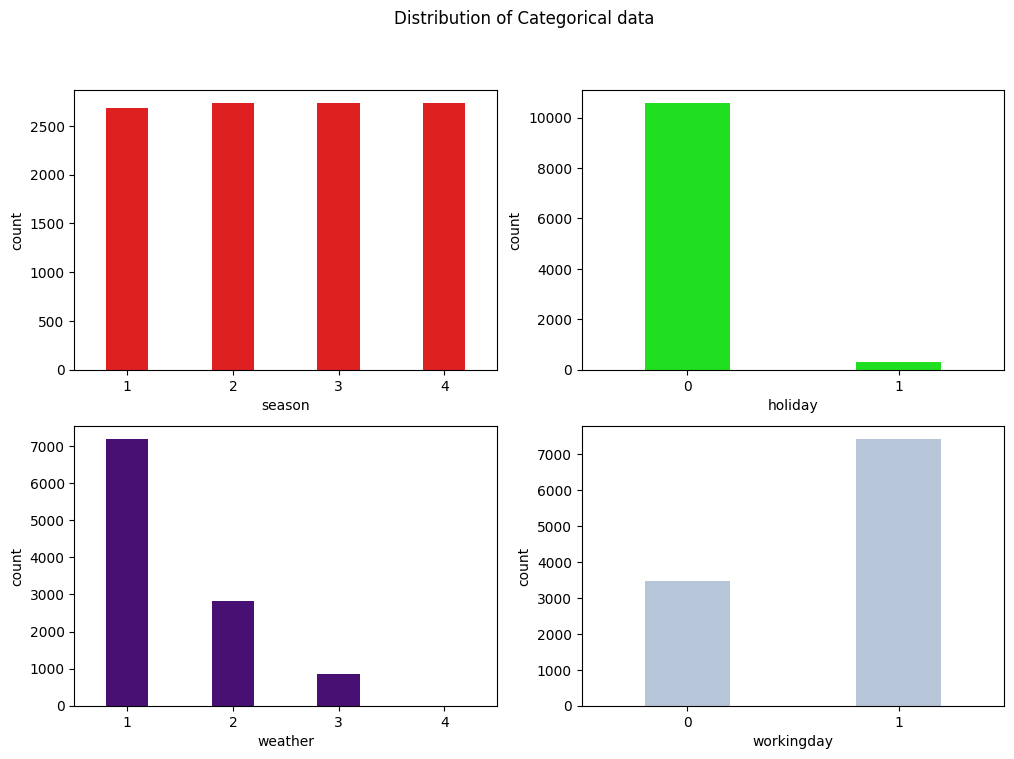

In [195]:
plt.figure(figsize=(12,8))
plt.suptitle('Distribution of Categorical data')
plt.subplot(2,2,1)
sns.countplot(data=df,x='season',color='red',width= 0.4)
plt.subplot(2,2,2)
sns.countplot(data=df,x='holiday',color='lime',width= 0.4)
plt.subplot(2,2,3)
sns.countplot(data=df,x='weather',color='indigo',width= 0.4)
plt.subplot(2,2,4)
sns.countplot(data=df,x='workingday',color='lightsteelblue',width= 0.4)

Numerical variables analyses

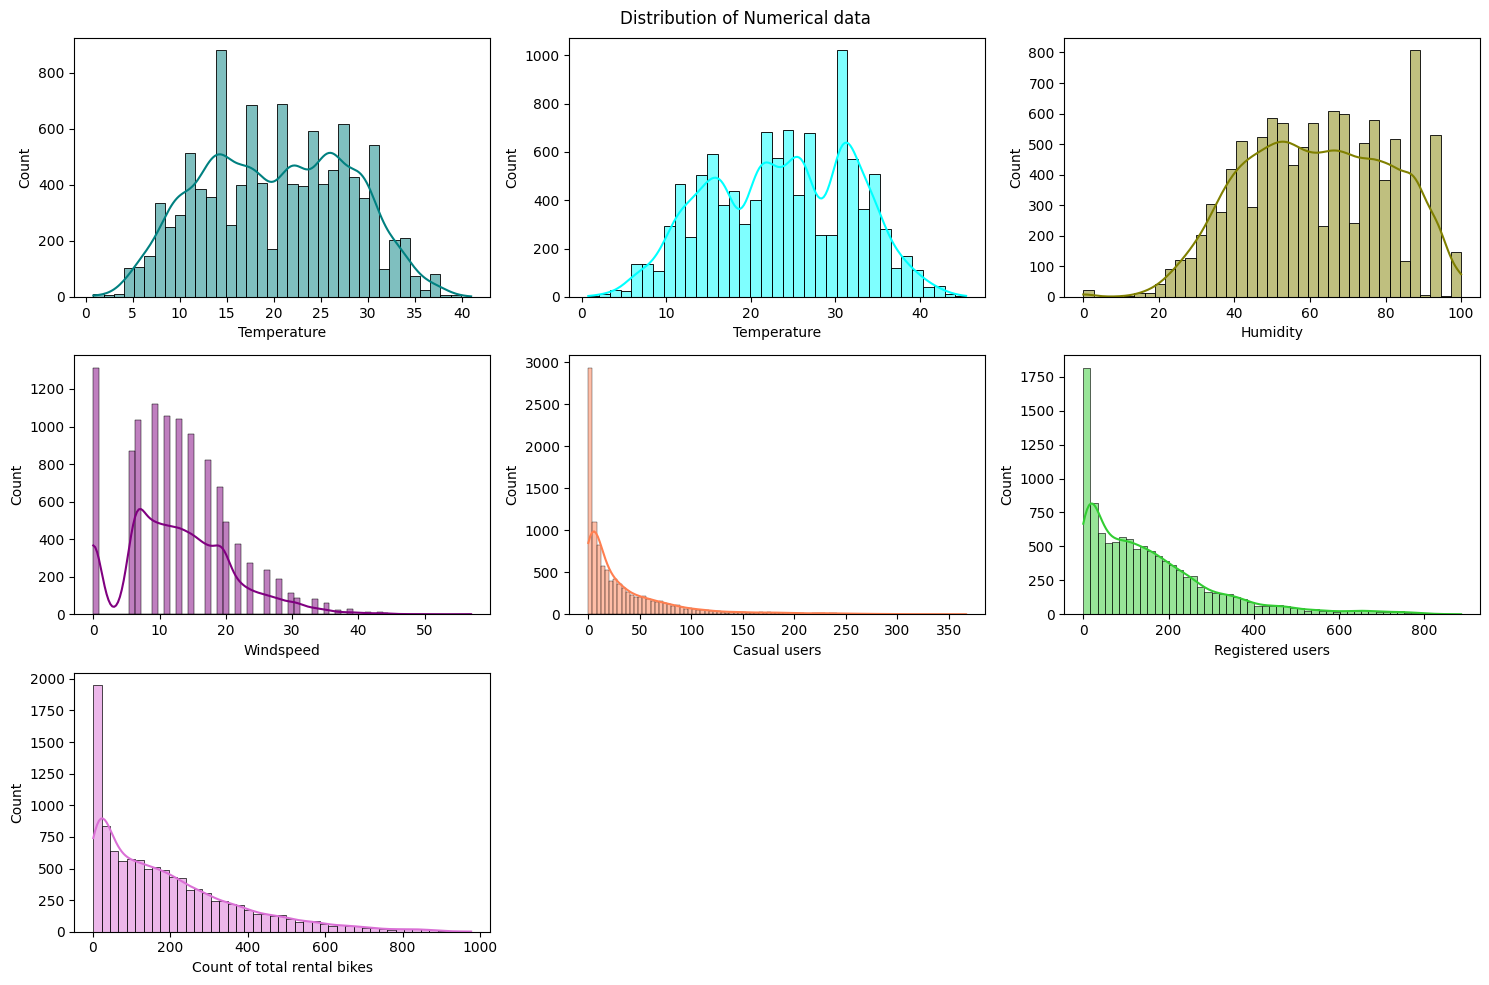

In [190]:
# numerical = []
plt.figure(figsize=(15,10))
plt.suptitle('Distribution of Numerical data')
plt.subplot(3,3,1)
sns.histplot(data=df,x='temp',kde=True,color='teal')
plt.xlabel('Temperature')
plt.subplot(3,3,2)
sns.histplot(data=df,x='atemp',kde=True,color='aqua')
plt.xlabel('Temperature')
plt.subplot(3,3,3)
sns.histplot(data=df,x='humidity',kde=True,color='olive')
plt.xlabel('Humidity')
plt.subplot(3,3,4)
sns.histplot(data=df,x='windspeed',kde=True,color='purple')
plt.xlabel('Windspeed')
plt.subplot(3,3,5)
sns.histplot(data=df,x='casual',kde=True,color='coral')
plt.xlabel('Casual users')
plt.subplot(3,3,6)
sns.histplot(data=df,x='registered',kde=True,color='limegreen')
plt.xlabel('Registered users')
plt.subplot(3,3,7)
sns.histplot(data=df,x='count',kde=True,color='orchid')
plt.xlabel('Count of total rental bikes')
plt.tight_layout()
plt.show()

## Check for Outliers

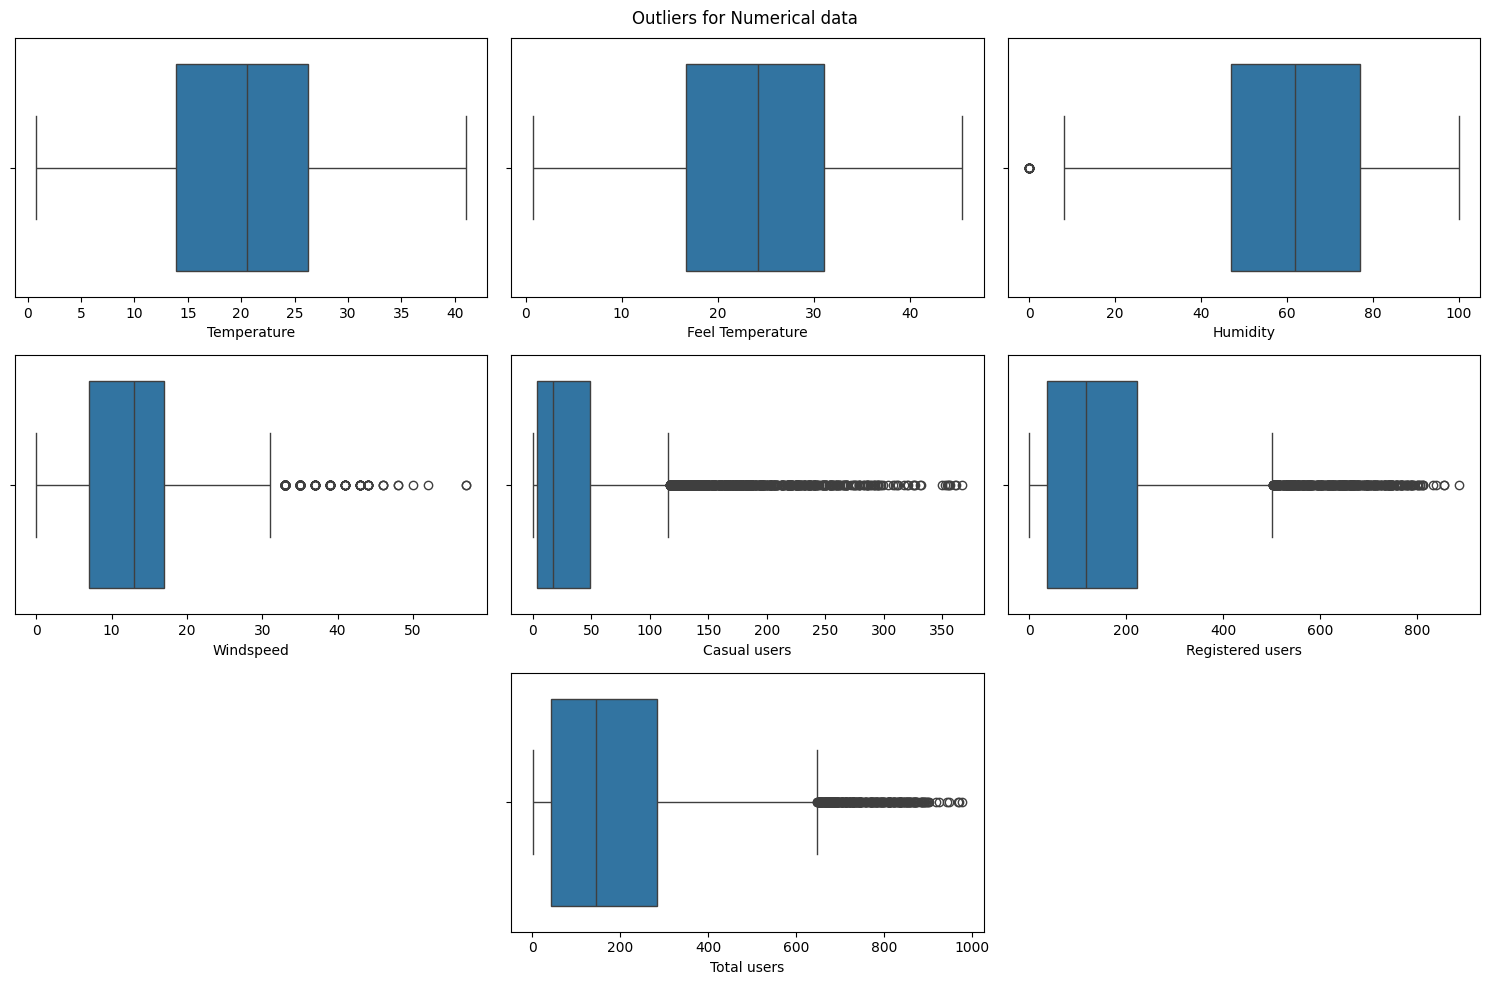

In [199]:
numerical= ['temp','atemp','humidity','windspeed','casual','registered']
plt.figure(figsize=(15,10))
plt.suptitle('Outliers for Numerical data')
plt.subplot(3,3,1)
sns.boxplot(data=df,x='temp')
plt.xlabel('Temperature')
plt.subplot(3,3,2)
sns.boxplot(data=df,x='atemp')
plt.xlabel('Feel Temperature')
plt.subplot(3,3,3)
sns.boxplot(data=df,x='humidity')
plt.xlabel('Humidity')
plt.subplot(3,3,4)
sns.boxplot(data=df,x='windspeed')
plt.xlabel('Windspeed')
plt.subplot(3,3,5)
sns.boxplot(data=df,x='casual')
plt.xlabel('Casual users')
plt.subplot(3,3,6)
sns.boxplot(data=df,x='registered')
plt.xlabel('Registered users')
plt.subplot(3,3,8)
sns.boxplot(data=df,x='count')
plt.xlabel('Total users')
plt.tight_layout()
plt.show()

-  windspeed, casual users and registered users have outliers in the data
-  It can be observed that the Causal and Registered users have outliers in great number may be due to unusual events like holidays etc
-  outliers in windspeed variable suggests seasonal changes

<Axes: xlabel='weather', ylabel='count'>

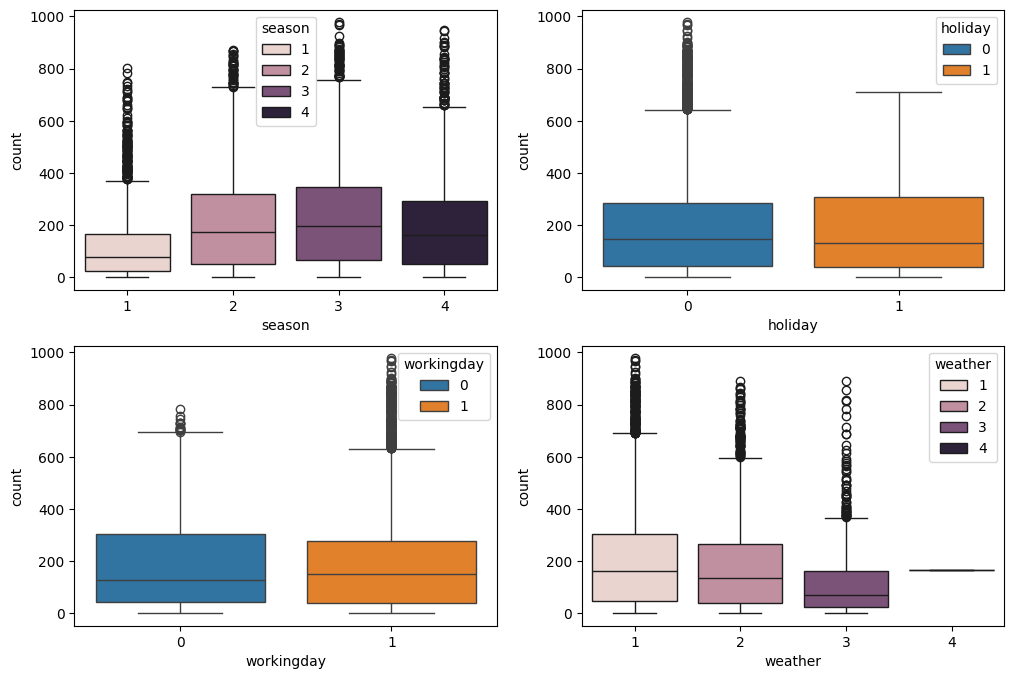

In [219]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='season',y='count',hue='season')
plt.subplot(2,2,2)
sns.boxplot(data=df,x='holiday',y='count',hue='holiday')
plt.subplot(2,2,3)
sns.boxplot(data=df,x='workingday',y='count',hue='workingday')
plt.subplot(2,2,4)
sns.boxplot(data=df,x='weather',y='count',hue='weather')

<Axes: xlabel='registered', ylabel='count'>

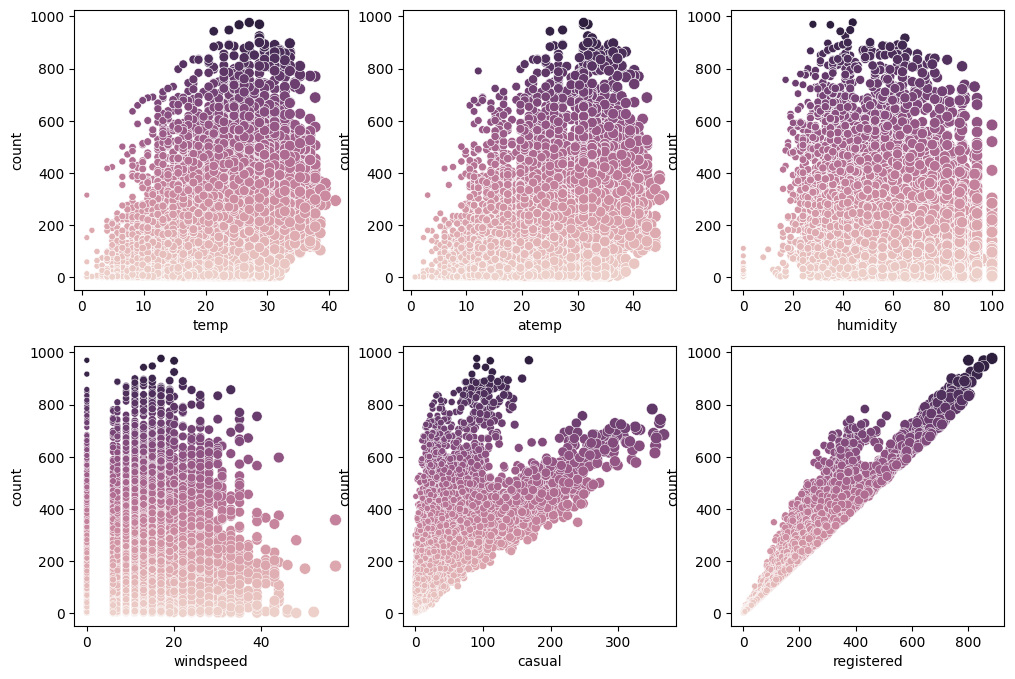

In [230]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.scatterplot(data=df,x='temp',y='count',hue = 'count',size='temp',legend=False)
plt.subplot(2,3,2)
sns.scatterplot(data=df,x='atemp',y='count',hue = 'count',size='atemp',legend=False)
plt.subplot(2,3,3)
sns.scatterplot(data=df,x='humidity',y='count',hue = 'count',size='humidity',legend=False)
plt.subplot(2,3,4)
sns.scatterplot(data=df,x='windspeed',y='count',hue = 'count',size='windspeed',legend=False)
plt.subplot(2,3,5)
sns.scatterplot(data=df,x='casual',y='count',hue = 'count',size='casual',legend=False)
plt.subplot(2,3,6)
sns.scatterplot(data=df,x='registered',y='count',hue = 'count',size='registered',legend=False)

## Establishing a Relationship between the Dependent and Independent Variables

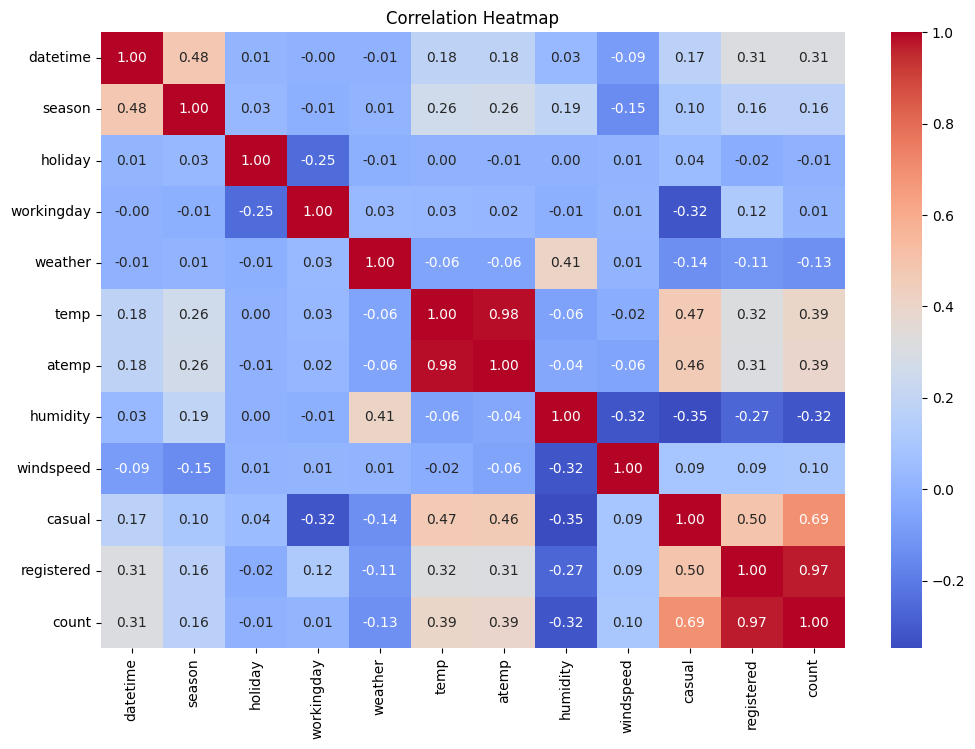

In [237]:
x = df
x['datetime'] = pd.to_datetime(x['datetime'])
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

In [233]:
weekend = df[df['workingday']==0]
weekday = df[df['workingday']==1]
n1 = weekend['count'].sample(1000)
n2 = weekday['count'].sample(1000)
alpha = 0.05
Ho = 'There is no significant difference between the no of bike rides on weekends and weekdays'
Ha = 'There is significant difference between the no of bike rides on weekends and weekdays'
statistic,pvalue = ttest_ind(n1,n2,alternative ='two-sided')
if pvalue < alpha :
  print(pvalue)
  print('Reject Null Hypothesis')
  print(Ha)
else:
  print(pvalue)
  print('Fail to Reject Null Hypothesis')
  print(Ho)

0.15700971282065324
Fail to Reject Null Hypothesis
There is no significant difference between the no of bike rides on weekends and weekdays


- p is high so null will fly hence fail to reject null hypothesis
- It can be concluded that there is no significant difference in the total no of bike rides during weekends and weekdays
- It can be suggested that the people riding habits are consistent

*   Connclusions:
  -  As there is no significant difference between total no bike rides during weekends and weekdays suggest consistent customer demand
  -  Data indicates that bikes are used for both professional and personal uses
  -  Also suggests that availability of bikes throughout the week
*   Recommendations:
  -  Marketing can be done evenly throughout the week
  -  requires constant customer service support for customer satisfaction






## Check if the demand of bicycles on rent is the same for different Weather conditions?

In [84]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [88]:
clear_weather = df[df['weather']==1]
misty_weather = df[df['weather']==2]
light_rainfall = df[df['weather']==3]
heavy_rainfall = df[df['weather']==4]
n1 = clear_weather['count'].sample(500)
n2 = misty_weather['count'].sample(500)
n3 = light_rainfall['count'].sample(100)
alpha = 0.05
Ho = 'There is no significant difference for the demand of bicycles for different weather conditions'
Ha = 'There is significant difference for the demand of bicycles for different weather conditions'
statistic, pvalue = f_oneway(n1,n2,n3)
if pvalue < alpha :
  print(pvalue)
  print('Reject Null Hypothesis')
  print(Ha)
else:
  print(pvalue)
  print('Fail to Reject Null Hypothesis')
  print(Ho)

4.173919143546038e-05
Reject Null Hypothesis
There is significant difference for the demand of bicycles for different weather conditions


Verifying Assumptions

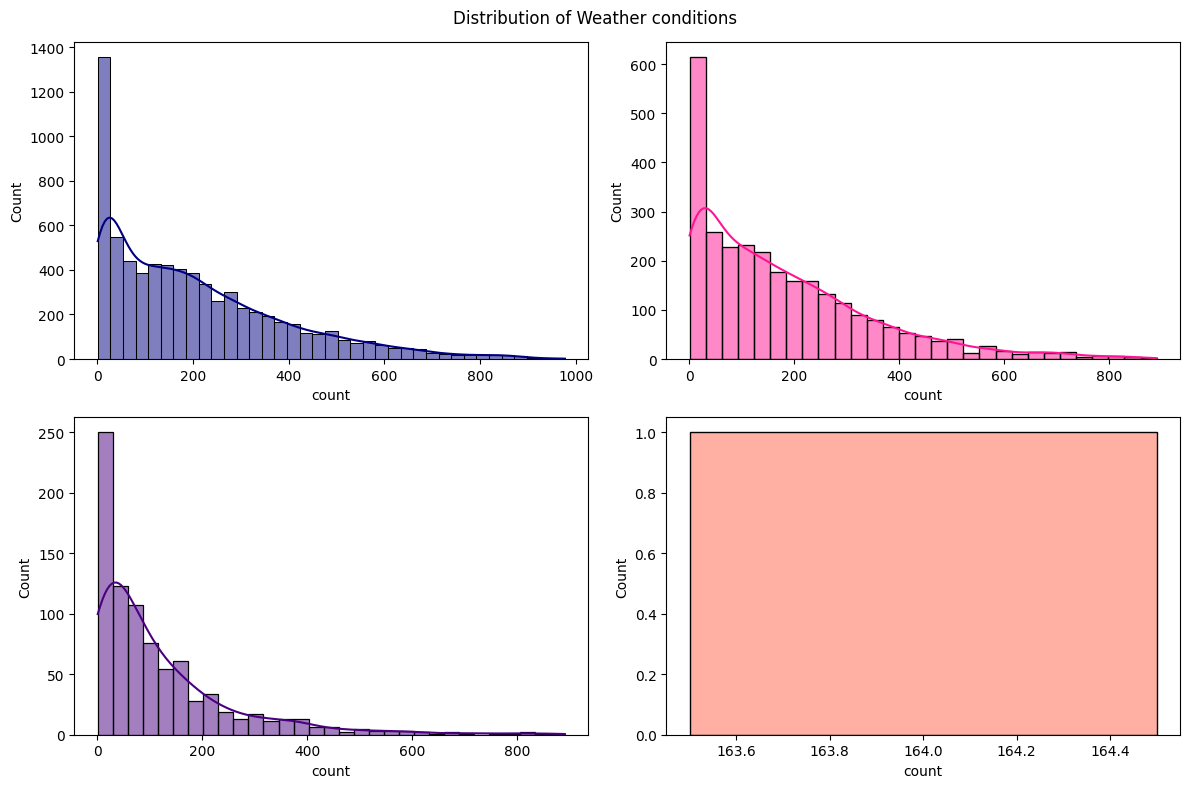

In [202]:
clear_weather = df[df['weather']==1]
misty_weather = df[df['weather']==2]
light_rainfall = df[df['weather']==3]
heavy_rainfall = df[df['weather']==4]
plt.figure(figsize=(12,8))
plt.suptitle('Distribution of Weather conditions')
plt.subplot(2,2,1)
sns.histplot(clear_weather,x='count',kde=True,color = 'navy')
plt.subplot(2,2,2)
sns.histplot(misty_weather,x='count',kde=True,color = 'deeppink')
plt.subplot(2,2,3)
sns.histplot(light_rainfall,x='count',kde=True,color = 'indigo')
plt.subplot(2,2,4)
sns.histplot(heavy_rainfall,x='count',kde=True,color = 'tomato')
plt.tight_layout()
plt.show()

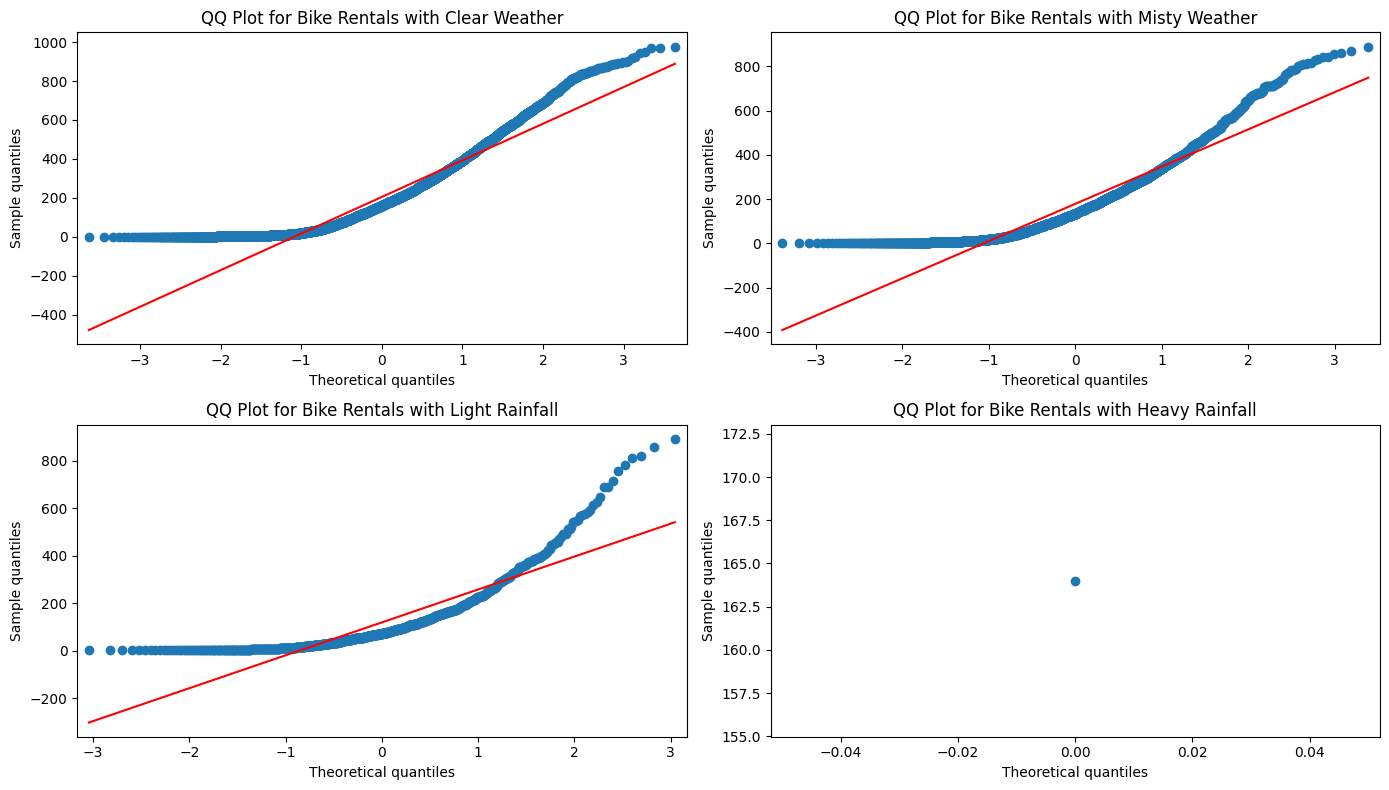

In [147]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))
qqplot(data=clear_weather['count'], line='s', ax=ax1)
ax1.set_title('QQ Plot for Bike Rentals with Clear Weather')
ax1.set_xlabel('Theoretical quantiles')
ax1.set_ylabel('Sample quantiles')
qqplot(data=misty_weather['count'], line='s', ax=ax2)
ax2.set_title('QQ Plot for Bike Rentals with Misty Weather')
ax2.set_xlabel('Theoretical quantiles')
ax2.set_ylabel('Sample quantiles')
qqplot(data=light_rainfall['count'], line='s', ax=ax3)
ax3.set_title('QQ Plot for Bike Rentals with Light Rainfall')
ax3.set_xlabel('Theoretical quantiles')
ax3.set_ylabel('Sample quantiles')
qqplot(data=heavy_rainfall['count'], line='s', ax=ax4)
ax4.set_title('QQ Plot for Bike Rentals with Heavy Rainfall')
ax4.set_xlabel('Theoretical quantiles')
ax4.set_ylabel('Sample quantiles')
plt.tight_layout()
plt.show()

Testing equality variance

In [164]:
clear = df[df['weather']==1]['count']
misty = df[df['weather']==2]['count']
low_rainfall = df[df['weather']==3]['count']
heavy_rainfall = df[df['weather']==4]['count']
alpha = 0.05
Ho = 'Variances are similar among the different weather conditions'
Ha = 'Variances are significantly different among the different weathr conditions'
statistic,pvalue = levene(clear,misty,low_rainfall)
if pvalue < alpha:
  print(pvalue)
  print('Reject Null Hypothesis')
  print(Ha)
else:
  print(pvalue)
  print('Fail to reject Null Hypothesis')
  print(Ho)

6.198278710731511e-36
Reject Null Hypothesis
Variances are significantly different among the different weathr conditions


**- Conclusions and Recommendations:**
  - p is low so null will go hence reject null hypothesis
  - It can be concluded that there is significant difference in the total no of bike rides during different weather conditions
  - Suggests weather has significant impact on the demand for bike rental service
  - can be concluded that the availability of service is varying based on the weather conditions
  - can be concluded that customers are more tended to demand for yulu services under the influence of weather conditions
  - Distribution of weather conditions is not following normal distributions
  - can be concluded that the variance is different for weather conditions and is significant


## Check if the demand of bicycles on rent is the same for different Seasons?

In [91]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [93]:
spring = df[df['season']==1]
summer = df[df['season']==2]
fall = df[df['season']==3]
winter = df[df['season']==4]
n1 = spring['count'].sample(100)
n2 = summer['count'].sample(100)
n3 = fall['count'].sample(100)
n4 = winter['count'].sample(100)
alpha = 0.05
Ho = 'There is no significant difference for the demand of bicycles for different seasons'
Ha = 'There is significant difference for the demand of bicycles for different seasons'
statistic, pvalue = f_oneway(n1,n2,n3,n4)
if pvalue < alpha :
  print(pvalue)
  print('Reject Null Hypothesis')
  print(Ha)
else:
  print(pvalue)
  print('Fail to Reject Null Hypothesis')
  print(Ho)

2.714030513705741e-06
Reject Null Hypothesis
There is significant difference for the demand of bicycles for different seasons


Verifying Assumptions

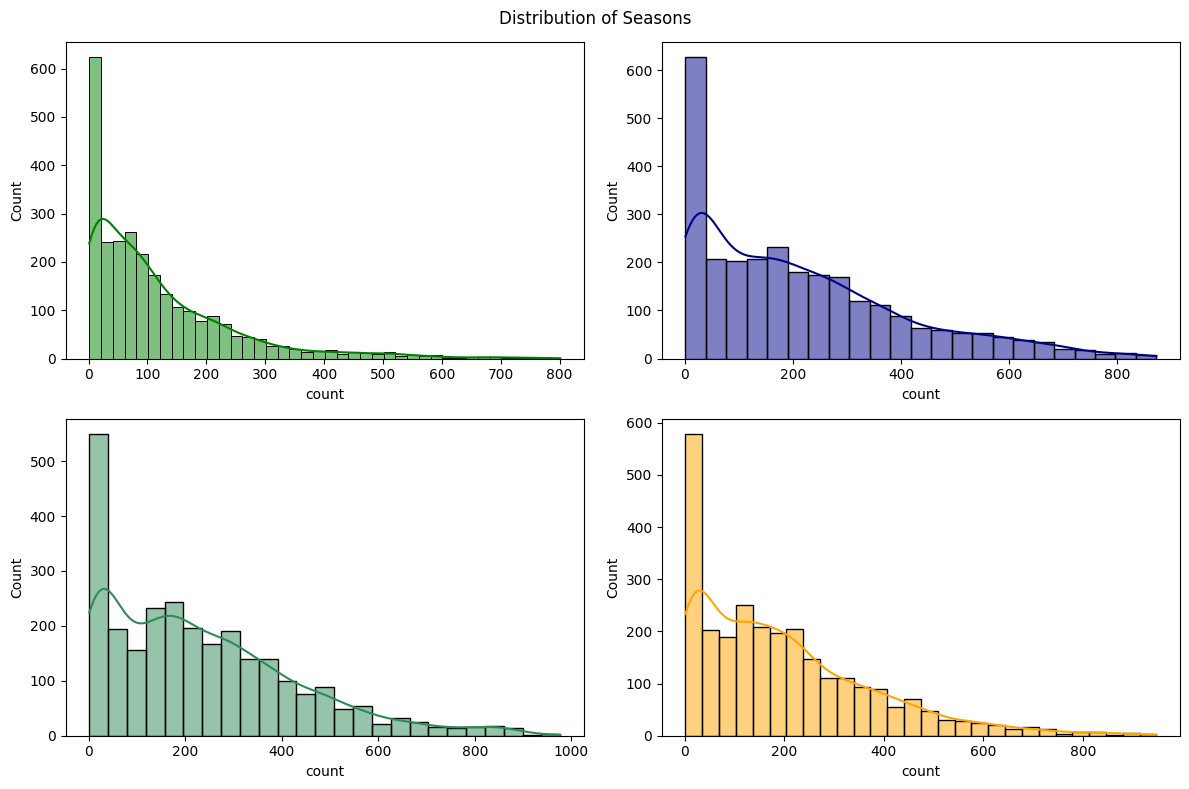

In [180]:
spring = df[df['season']==1]
summer = df[df['season']==2]
fall = df[df['season']==3]
winter = df[df['season']==4]
plt.figure(figsize=(12,8))
plt.suptitle('Distribution of Seasons')
plt.subplot(2,2,1)
sns.histplot(spring,x='count',kde = True,color = 'green')
plt.subplot(2,2,2)
sns.histplot(summer,x='count',kde = True,color = 'darkblue')
plt.subplot(2,2,3)
sns.histplot(fall,x='count',kde = True,color = 'seagreen')
plt.subplot(2,2,4)
sns.histplot(winter,x='count',kde = True,color = 'orange')
plt.tight_layout()
plt.show()

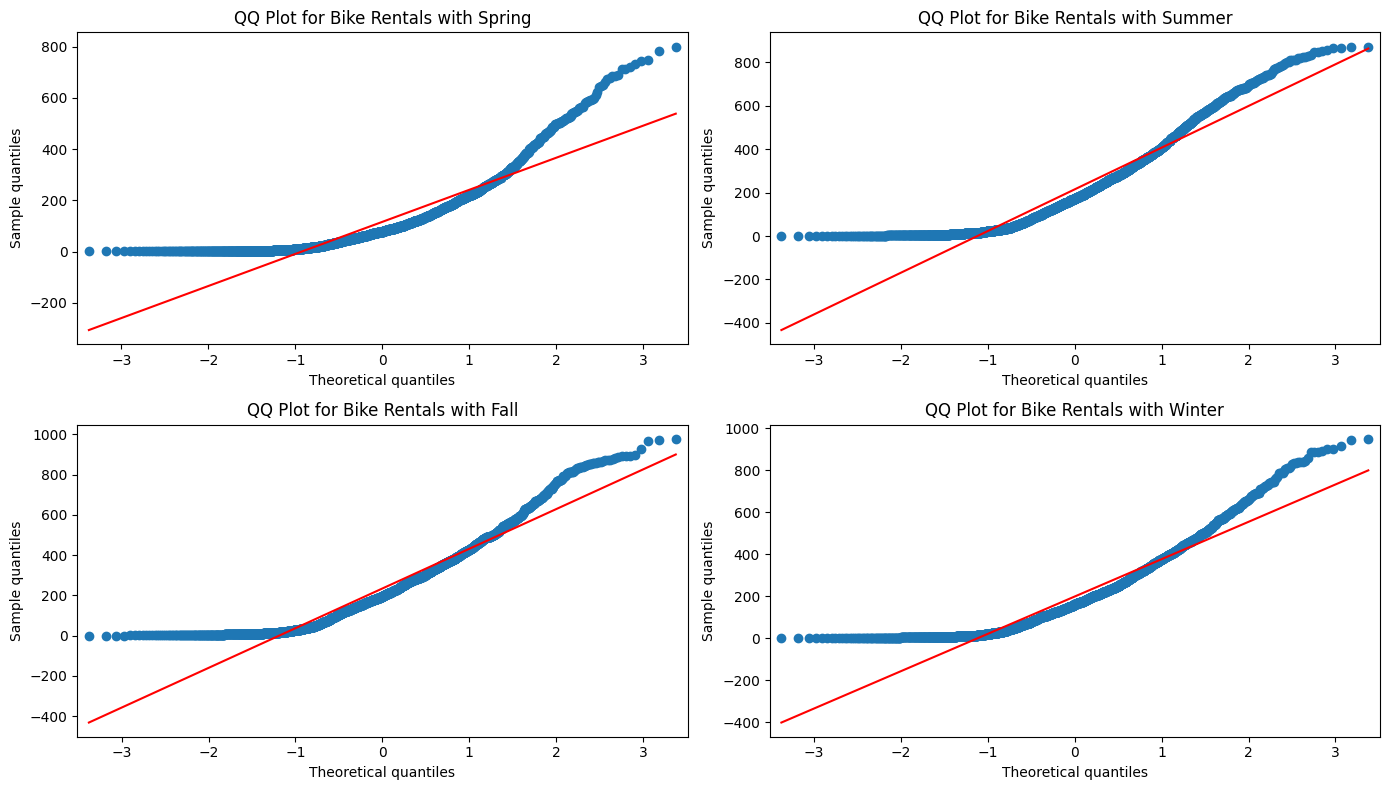

In [181]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))
qqplot(data=spring['count'], line='s', ax=ax1)
ax1.set_title('QQ Plot for Bike Rentals with Spring')
ax1.set_xlabel('Theoretical quantiles')
ax1.set_ylabel('Sample quantiles')
qqplot(data=summer['count'], line='s', ax=ax2)
ax2.set_title('QQ Plot for Bike Rentals with Summer')
ax2.set_xlabel('Theoretical quantiles')
ax2.set_ylabel('Sample quantiles')
qqplot(data=fall['count'], line='s', ax=ax3)
ax3.set_title('QQ Plot for Bike Rentals with Fall')
ax3.set_xlabel('Theoretical quantiles')
ax3.set_ylabel('Sample quantiles')
qqplot(data=winter['count'], line='s', ax=ax4)
ax4.set_title('QQ Plot for Bike Rentals with Winter')
ax4.set_xlabel('Theoretical quantiles')
ax4.set_ylabel('Sample quantiles')
plt.tight_layout()
plt.show()

Testing equality variance

In [183]:
spring_df = df[df['season']==1]['count']
summer_df = df[df['season']==2]['count']
fall_df = df[df['season']==3]['count']
winter_df = df[df['season']==4]['count']
alpha = 0.05
Ho = 'Variances are similar among the different seasons'
Ha = 'Variances are significantly different among the different seasons'
statistic,pvalue = levene(spring_df,summer_df,fall_df,winter_df)
if pvalue < alpha:
  print(pvalue)
  print('Reject Null Hypothesis')
  print(Ha)
else:
  print(pvalue)
  print('Fail to reject Null Hypothesis')
  print(Ho)

1.0147116860043298e-118
Reject Null Hypothesis
Variances are significantly different among the different seasons


**Conclusions and Recommendations**
- pvalue is low so null will go hence rejecting null hypothesis
- There is significant differnece for the demand of bicycles for different seasons
- demand for rentals during different seasons do not follow normal distribution
- variances are also significantly different among different seasons
- Rental demand varies significantly across different seasons, indicating that there are specific seasons when demand is higher or lower
- Yulu needs to focus on the seasons where the customer demand is low and can focus on that area
- Yulu can also manage the services in higher priority during the peak season to meet the customer demands:

## Check if the Weather conditions are significantly different during different Seasons?

In [81]:
df['season'].unique()

array([1, 2, 3, 4])

In [117]:
contingency_Table = pd.crosstab(df['weather'], df['season'])
Ho = 'There is no significant difference in weather conditions during different seasons'
Ha = 'There is significant difference in weather conditions during different seasons'
alpha = 0.05
chi2, pvalue, dof, expected = chi2_contingency(contingency_Table)
if pvalue < alpha :
  print(pvalue)
  print('Reject Null Hypothesis')
  print(Ha)
else:
  print(pvalue)
  print('Fail to Reject Null Hypothesis')
  print(Ho)

1.5499250736864862e-07
Reject Null Hypothesis
There is significant difference in weather conditions during different seasons


- pvalue 1.5499250736864862e-07 and alpha is 0.05
  -  as pvalue is low null will go hence we reject null hypothesis
  -  We can conclude that there is significant difference in weather conditions during different seasons

Possible conclusions:
- Weather conditions vary significantly during seasons which will influence the rentals of bikes
- This could be due to the change in humidity and temperature
- By keeping track of weather conditions in the region yulu can adjust its operations accordingly
- It can also help in maintenace of the infrastructure for bike